# EDN Video Game Sales


**Dataset info:** This Dataset was downloaded from Kaggle.

## Read Data

In [1]:
import pandas as pd 

In [2]:
vgsales_df = pd.read_csv("/Users/admin/Downloads/Raw data/vgsales.csv")

In [3]:
vgsales_df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


## Data Preparation & Cleaning

In [4]:
vgsales_df.shape

(16598, 11)

In [5]:
vgsales_df.columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

In [6]:
vgsales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [7]:
vgsales_df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [8]:
missing_value = vgsales_df.isna().sum()

In [9]:
missing_value

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [10]:
missing_df = vgsales_df.isnull().sum(axis=0).reset_index()
missing_df.columns = ['variable', 'missing values']
missing_df['filling factor (%)']=(vgsales_df.shape[0]-missing_df['missing values'])/vgsales_df.shape[0]*100
missing_df.sort_values('filling factor (%)').reset_index(drop = True)

,variable,missing values,filling factor (%)
0,Year,271,98.367273
1,Publisher,58,99.650560
2,Rank,0,100.000000
3,Name,0,100.000000
4,Platform,0,100.000000
5,Genre,0,100.000000
6,NA_Sales,0,100.000000
7,EU_Sales,0,100.000000
8,JP_Sales,0,100.000000
9,Other_Sales,0,100.000000


We see that the variables filling factor is quite good (> 98%). I decide to proceed without trying to impute what's missing and I simply remove the entries that contain missing values.


**Create region_sales column only counted sales by defined regions: NA,EU,JP**

In [11]:
vgsales_df['Region_Sales'] = vgsales_df.NA_Sales + vgsales_df.EU_Sales + vgsales_df.JP_Sales

In [12]:
vgsales_df.head(5)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Region_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,74.28
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,39.47
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,32.52
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,30.04
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,30.38


## Exploratory Analysis and Visualization

Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [13]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

/Applications/anaconda3/lib/python3.8/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


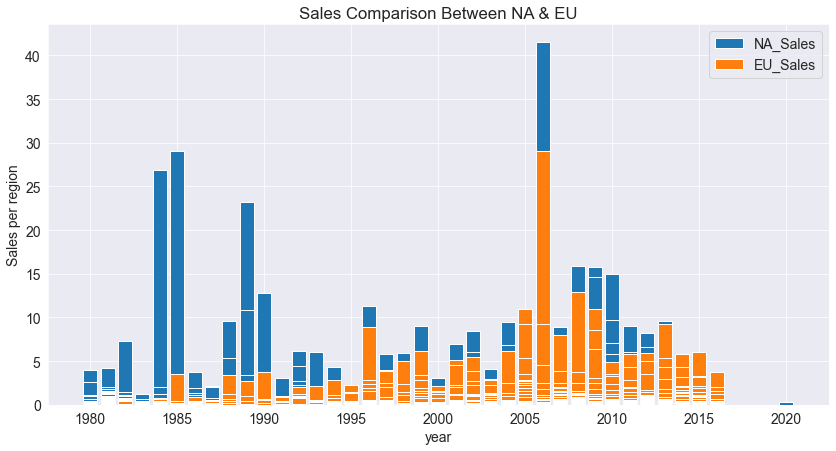

In [44]:
plt.figure(figsize=(14, 7))
plt.bar(vgsales_df.Year, vgsales_df.NA_Sales)
plt.bar(vgsales_df.Year, vgsales_df.EU_Sales)
plt.xlabel('year')
plt.ylabel('Sales per region');

plt.title("Sales Comparison Between NA & EU")
plt.legend(['NA_Sales','EU_Sales']);

**This bar graph is a comparison of sales between NA & EU. We can see the sales of NA is higher than EU before 1994 but after 1995 sales in EU increased significantly until 2015.**

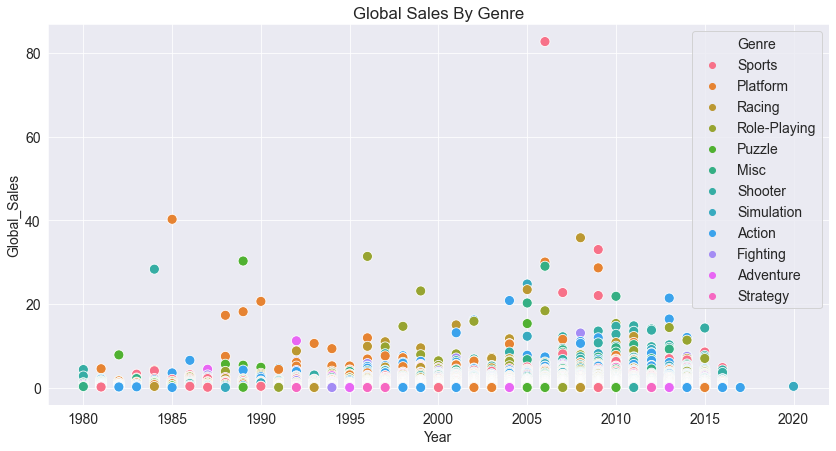

In [57]:
plt.figure(figsize=(14, 7))
plt.title('Global Sales By Genre')
sns.scatterplot(x='Year', 
                y='Global_Sales', 
                hue='Genre',
                s=100,
                data=vgsales_df);

**This scatterplot graph shows the global sales by genre. The sales of sport genre is significantly increased in 2006.**

In [18]:
top10= vgsales_df.loc[0:9]

In [19]:
top10

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Region_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,74.28
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,39.47
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,32.52
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,30.04
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,30.38
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,29.68
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01,27.11
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02,26.16
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62,26.35
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,27.84


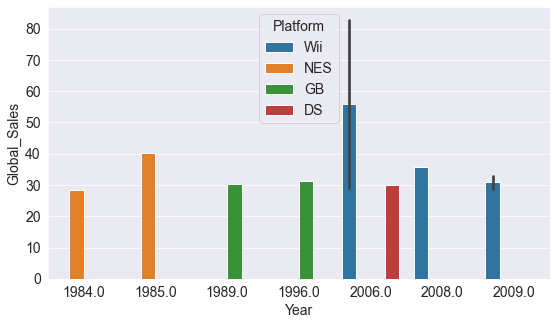

In [41]:
sns.barplot(x='Year', y='Global_Sales', hue='Platform', data=top10);

**This barplot graph is shows the Top Platform by Top 10 Global Sales**

## Asking & Answering Questions

#### Q1: What is the Top 10- total of Global Sales by Year?

In [58]:
Total_Sales_Per_Year= vgsales_df.groupby('Year')['Global_Sales'].sum()

In [60]:
Top10 = Total_Sales_Per_Year.sort_values(ascending = False).head(10)

In [61]:
Top10

Year
2008.0    678.90
2009.0    667.30
2007.0    611.13
2010.0    600.45
2006.0    521.04
2011.0    515.99
2005.0    459.94
2004.0    419.31
2002.0    395.52
2013.0    368.11
Name: Global_Sales, dtype: float64

Using groupby and sort values function to find top 10 global sales by year

#### Q2: What is the Top 5 of NA Sales?

In [63]:
Top5_NA = vgsales_df.sort_values('NA_Sales',ascending = False).head(5)

In [64]:
Top5_NA

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Region_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,74.28
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,39.47
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,27.84
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,29.68
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,32.52


Using sort values function to find top 5 NA Sales

#### Q3: Which platform receive the highest sales?

In [65]:
Sales_by_platform = vgsales_df.groupby('Platform')['Global_Sales'].sum()
Top_platform = Sales_by_platform.sort_values(ascending = False).head(5)
Top_platform

Platform
PS2     1255.64
X360     979.96
PS3      957.84
Wii      926.71
DS       822.49
Name: Global_Sales, dtype: float64

To answer this question. I used group by & sort values function to define the highest global sales by platform. the output shows 5 platforms sort by ascending.

#### Q4: Compare the sales between NA & EU in 2000

In [68]:
import numpy as np

In [72]:
NASales = vgsales_df.groupby('Year')['NA_Sales'].sum()
NASales[2000]

94.49000000000005

In [71]:
EUSales = vgsales_df.groupby('Year')['EU_Sales'].sum()
EUSales[2000]

52.75000000000003

The output shows `NASales_2000(94.49)` > `EUSales_2000(52.75)`. I used numpy to get the sales of 2000

#### Q5: Name the top5 game

In [74]:
vgsales_df.iloc[0:5]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Region_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,74.28
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,39.47
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,32.52
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,30.04
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,30.38


This output returns top5 games (rank 1 to 5). Using iloc function to recieve row 1 to 5